# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

# Read Datafile and create dataframe

In [2]:
item_df = pd.read_csv('content/jio_mart_items.csv' )
item_df.info()
item_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162313 entries, 0 to 162312
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   category      162313 non-null  object 
 1   sub_category  162313 non-null  object 
 2   href          162313 non-null  object 
 3   items         162280 non-null  object 
 4   price         162282 non-null  float64
dtypes: float64(1), object(4)
memory usage: 6.2+ MB


,category,sub_category,href,items,price
0,Groceries,Fruits & Vegetables,https://www.jiomart.com/c/groceries/fruits-veg...,Fresh Dates (Pack) (Approx 450 g - 500 g),109.0
1,Groceries,Fruits & Vegetables,https://www.jiomart.com/c/groceries/fruits-veg...,Tender Coconut Cling Wrapped (1 pc) (Approx 90...,49.0
2,Groceries,Fruits & Vegetables,https://www.jiomart.com/c/groceries/fruits-veg...,Mosambi 1 kg,69.0
3,Groceries,Fruits & Vegetables,https://www.jiomart.com/c/groceries/fruits-veg...,Orange Imported 1 kg,125.0
4,Groceries,Fruits & Vegetables,https://www.jiomart.com/c/groceries/fruits-veg...,Banana Robusta 6 pcs (Box) (Approx 800 g - 110...,44.0


There are null values in items. Drop rows with null in items

In [3]:
item_df = item_df.loc[~item_df['items'].isna(), :]

In [4]:
item_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162280 entries, 0 to 162312
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   category      162280 non-null  object 
 1   sub_category  162280 non-null  object 
 2   href          162280 non-null  object 
 3   items         162280 non-null  object 
 4   price         162280 non-null  float64
dtypes: float64(1), object(4)
memory usage: 7.4+ MB


# Exploratory Data Analysis

Count of rows in each category

In [5]:
item_df.category.value_counts()

,count
category,
Home & Kitchen,60329
Groceries,46043
Fashion,26087
Electronics,19018
Beauty,10733
Jewellery,70


<Axes: xlabel='category'>

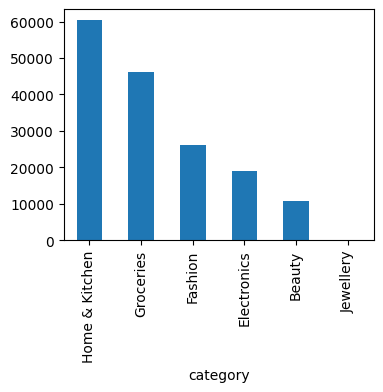

In [6]:
item_df.category.value_counts().plot(kind='bar',figsize = (4, 3))

In [7]:
item_df.category.nunique()

6

Count of rows in sub-categories

In [8]:
item_df.groupby ('category')['sub_category'].value_counts()

category        sub_category                       
Beauty          Make-Up                                3962
                Fragrances                             2335
                Skin Care                              1837
                Personal Care                          1234
                Hair                                    993
                                                       ... 
Home & Kitchen  Hardware & Plumbing                      30
                Handloom & Handicraft                    15
                Building Supplies & Measuring Tools       1
                Personal Wear                             1
Jewellery       Fine Jewellery                           70
Name: count, Length: 71, dtype: int64

In [9]:
item_df.sub_category.nunique()

69

<Axes: xlabel='sub_category'>

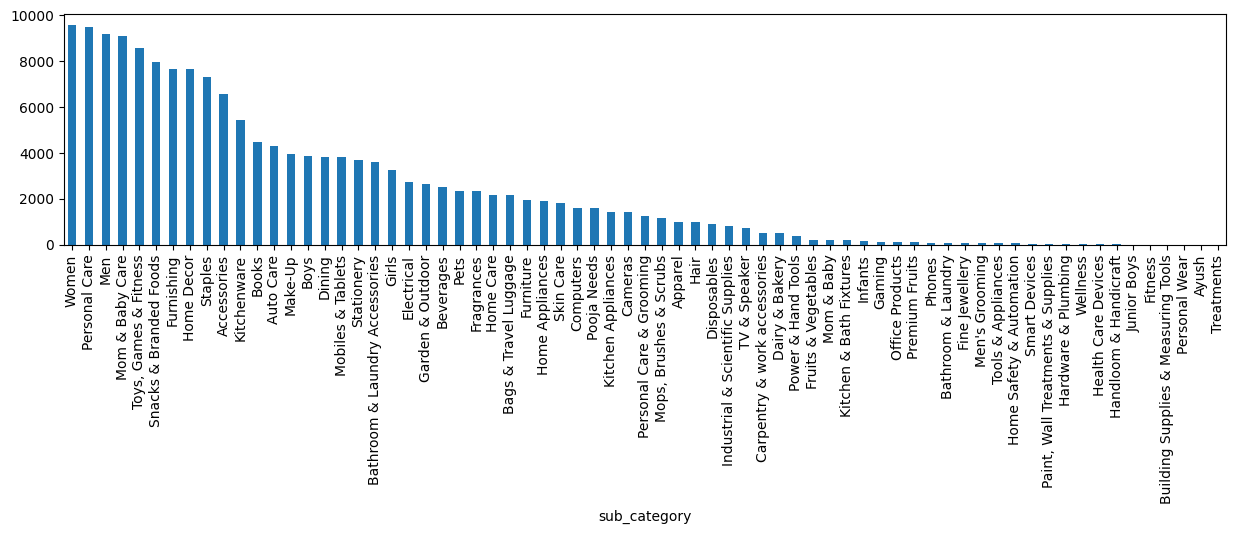

In [10]:
item_df.sub_category.value_counts().plot(kind='bar',figsize = (15, 3))

In [11]:
item_df.groupby('sub_category').count()

,category,href,items,price
sub_category,,,,
Accessories,6577,6577,6577,6577
Apparel,1010,1010,1010,1010
Auto Care,4328,4328,4328,4328
Ayush,1,1,1,1
Bags & Travel Luggage,2154,2154,2154,2154
...,...,...,...,...
Tools & Appliances,67,67,67,67
"Toys, Games & Fitness",8594,8594,8594,8594
Treatments,1,1,1,1


**Sub-categories having rows less than 25**

These sub-categories may not have sufficient data and may not be enough as training data

In [12]:
item_df['sub_category'].value_counts().loc[lambda x: x<25]

,count
sub_category,
Wellness,23
Health Care Devices,22
Handloom & Handicraft,15
Junior Boys,4
Fitness,3
Building Supplies & Measuring Tools,1
Personal Wear,1
Ayush,1
Treatments,1


In [13]:
#item_df.drop(item_df[item_df['category']=="Jewellery"].index,inplace=True)

href and price do not have relation with categorization. Drop these columns

In [14]:
item_df=item_df.drop(['href','price'],axis=1)

In [15]:
item_df.head()

,category,sub_category,items
0,Groceries,Fruits & Vegetables,Fresh Dates (Pack) (Approx 450 g - 500 g)
1,Groceries,Fruits & Vegetables,Tender Coconut Cling Wrapped (1 pc) (Approx 90...
2,Groceries,Fruits & Vegetables,Mosambi 1 kg
3,Groceries,Fruits & Vegetables,Orange Imported 1 kg
4,Groceries,Fruits & Vegetables,Banana Robusta 6 pcs (Box) (Approx 800 g - 110...


In [16]:
print(item_df.head(10)['items'].values)

['Fresh Dates (Pack) (Approx 450 g - 500 g)'
 'Tender Coconut Cling Wrapped (1 pc) (Approx 900 g - 1300 g)'
 'Mosambi 1 kg' 'Orange Imported 1 kg'
 'Banana Robusta 6 pcs (Box) (Approx 800 g - 1100 g)'
 'Custard Apple 4 pcs (Approx 750 g - 1000 g)'
 'Pineapple Queen 1 pc (Approx 700 g - 1200 g)'
 'Dates Imported (Approx 400 g - 500 g)'
 'Watermelon Kiran Big 1 pc (Approx. 2800 g - 4000 g)'
 'Pear Green Indian 6 pcs (Approx 700 g - 1000 g)']


# Data Preparation

Removing special charaters and converting to lower case

In [17]:
import re
item_df['items'] = (item_df['items'].str.replace(r'[^a-zA-Z\s]',' ',
    regex=True )).str.lower()
item_df.head()

,category,sub_category,items
0,Groceries,Fruits & Vegetables,fresh dates pack approx g g
1,Groceries,Fruits & Vegetables,tender coconut cling wrapped pc approx ...
2,Groceries,Fruits & Vegetables,mosambi kg
3,Groceries,Fruits & Vegetables,orange imported kg
4,Groceries,Fruits & Vegetables,banana robusta pcs box approx g ...


In [18]:
print(item_df.head(10)['items'].values)

['fresh dates  pack   approx     g       g '
 'tender coconut cling wrapped    pc   approx     g        g '
 'mosambi   kg' 'orange imported   kg'
 'banana robusta   pcs  box   approx     g        g '
 'custard apple   pcs  approx     g        g '
 'pineapple queen   pc  approx     g        g '
 'dates imported  approx     g       g '
 'watermelon kiran big   pc  approx       g        g '
 'pear green indian   pcs  approx     g        g ']


Function to remove whitespaces

In [19]:
def remove_whitespace(text):
    return " ".join(text.split())

text = "   This    is a    string   "
print("Input: {}".format(text))
print("Output: {}".format(remove_whitespace(text)))

Input:    This    is a    string   
Output: This is a string


Select 25,000 rows

In [20]:
item_df=item_df.sample(25000)

In [21]:
item_df['items']=item_df['items'].apply(remove_whitespace)

In [22]:
#print(item_df.head(10)['items'].values)
item_df.head()

,category,sub_category,items
98321,Home & Kitchen,Auto Care,carmate car steering cover finger grip for mar...
43413,Groceries,Books,tantropathy mudras postures and mantras for he...
95195,Home & Kitchen,"Mops, Brushes & Scrubs",shop by room grey color extra large wet and dr...
161293,Beauty,Personal Care,detoxie anti pollution de tan refreshing face ...
41118,Groceries,Books,riverside recipes collection of choice tested ...


# Vectorize Items

In [23]:
count_vec = CountVectorizer()
item_desc = count_vec.fit_transform(item_df['items'])
item_desc = np.array(item_desc.todense())
item_desc.shape[1]

15668

In [24]:
X = item_desc
y1 = item_df['category']
y2 = item_df['sub_category']

# Label Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
LE1 = LabelEncoder()
LE2 = LabelEncoder()
y1_enc = LE1.fit_transform(y1.values)
y2_enc = LE2.fit_transform(y2.values)

In [27]:
cat_label_mapping = {label: encoded for label, encoded in zip(LE1.classes_, LE1.transform(LE1.classes_))}
cat_label_mapping

{'Beauty': 0,
 'Electronics': 1,
 'Fashion': 2,
 'Groceries': 3,
 'Home & Kitchen': 4,
 'Jewellery': 5}

In [28]:
subcat_label_mapping = {label: encoded for label, encoded in zip(LE2.classes_, LE2.transform(LE2.classes_))}
subcat_label_mapping

{'Accessories': 0,
 'Apparel': 1,
 'Auto Care': 2,
 'Bags & Travel Luggage': 3,
 'Bathroom & Laundry': 4,
 'Bathroom & Laundry Accessories': 5,
 'Beverages': 6,
 'Books': 7,
 'Boys': 8,
 'Cameras': 9,
 'Carpentry & work accessories': 10,
 'Computers': 11,
 'Dairy & Bakery': 12,
 'Dining': 13,
 'Disposables': 14,
 'Electrical': 15,
 'Fine Jewellery': 16,
 'Fragrances': 17,
 'Fruits & Vegetables': 18,
 'Furnishing': 19,
 'Furniture': 20,
 'Gaming': 21,
 'Garden & Outdoor': 22,
 'Girls': 23,
 'Hair': 24,
 'Handloom & Handicraft': 25,
 'Hardware & Plumbing': 26,
 'Health Care Devices': 27,
 'Home Appliances': 28,
 'Home Care': 29,
 'Home Decor': 30,
 'Home Safety & Automation': 31,
 'Industrial & Scientific Supplies': 32,
 'Infants': 33,
 'Junior Boys': 34,
 'Kitchen & Bath Fixtures': 35,
 'Kitchen Appliances': 36,
 'Kitchenware': 37,
 'Make-Up': 38,
 'Men': 39,
 "Men's Grooming": 40,
 'Mobiles & Tablets': 41,
 'Mom & Baby': 42,
 'Mom & Baby Care': 43,
 'Mops, Brushes & Scrubs': 44,
 'Offi

# Split into training and test data

In [29]:
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1_enc,y2_enc, test_size=0.3,random_state=42)

# Multinomial Naive Bayes classifier

In [30]:
cat_model = MultinomialNB().fit(X_train, y1_train)

In [31]:
subcat_model = MultinomialNB().fit(X_train, y2_train)

In [32]:
cat_pred = cat_model.predict(X_test)
accuracy_score(y1_test, cat_pred)

0.9448

In [33]:
subcat_pred = subcat_model.predict(X_test)
accuracy_score(y2_test, subcat_pred)

0.8482666666666666

In [34]:
f1_score(y1_test, cat_pred, average="macro")

0.9063861473885938

In [35]:
print(classification_report(y1_test, cat_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89       536
           1       0.95      0.96      0.96       917
           2       0.94      0.98      0.96      1162
           3       0.95      0.92      0.93      2117
           4       0.96      0.95      0.96      2764
           5       0.75      0.75      0.75         4

    accuracy                           0.94      7500
   macro avg       0.90      0.91      0.91      7500
weighted avg       0.95      0.94      0.94      7500



# Other Algorithms

In [36]:
def modeling(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f"Model Accuarcy: {score*100}%")
    return y_pred

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

**K Nearest Neighbor**

In [ ]:
kn_model=KNeighborsClassifier()
kn_ypred = modeling(kn_model, X_train, y1_train, X_test, y1_test)

**Logistics Regression**

In [ ]:
ln_cat_model=LogisticRegression()
ln_cat_pred = modeling(ln_cat_model, X_train, y1_train, X_test, y1_test)

In [ ]:
ln_subcat_model=LogisticRegression()
ln_subcat_pred = modeling(ln_subcat_model, X_train, y2_train, X_test, y2_test)

# Testing

In [ ]:
new_item=['haldiram bakarwadi']
new_item_count=count_vec.transform(new_item)
item_cat_pred = ln_cat_model.predict(new_item_count)
item_subcat_pred = ln_subcat_model.predict(new_item_count)
decoded_cat_label = list(cat_label_mapping.keys())[list(cat_label_mapping.values()).index(item_cat_pred)]
decoded_subcat_label = list(subcat_label_mapping.keys())[list(subcat_label_mapping.values()).index(item_subcat_pred)]
# print(item_subcat_pred)
print("Category:",decoded_cat_label)
print("Sub Category:",decoded_subcat_label)